# #2020Census vs #2010Census tweets¶
**By Bernardo Lopez Vicencio, [NewsCounts](https://newscounts.org/)**


In this notebook we used #2020Census tweets and #2010Census tweets. For both censuses we looked into:

* Number of tweets per day
* Number of tweets per month
* Most active users
* The URLs being shared
* Mentions network
* Other hashtags used in the tweets

This work does not reach a significant conclusion. It is just intended to describe the conversation around the Census in 2020 and 2010, and it tries to highlight the main coincides and differences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
frames_2020 = []
frames_2010 = []
for m in range(1,6):
    temp_df_2010 = pd.read_csv(f"data/2010/hashtag_census_tweets_month_{m}.csv",parse_dates=["date"])
    temp_df_2020 = pd.read_csv(f"data/2020/hashtag_census_tweets_month_{m}.csv",parse_dates=["date"])
    frames_2020.append(temp_df_2020)
    frames_2010.append(temp_df_2010)

In [3]:
df_2020 = pd.concat(frames_2020).sort_values(by=['date'])
df_2010 = pd.concat(frames_2010).sort_values(by=['date'])
df_2020.reset_index(inplace = True)
df_2010.reset_index(inplace = True)
print(df_2020.shape)
df_2020.head()

(131943, 12)


,index,id,timestamp,username,text,hashtags,geo,retweets,favorites,mentions,to,date
0,10143,1.212480e+18,2020-01-01 21:05:29+00:00,CountTheNation,$800 BILLION WHO!? WHAT!? The more people cou...,#ThisisUS #StandUpBeCounted #2020Census #Every...,NaN,0,2,@ColorOfChange @NALEO @uscensusbureau,NaN,2020-01-01
1,10162,1.212449e+18,2020-01-01 19:00:56+00:00,WakeGOV,#HappyNewYear! The #2020Census is closer than ...,#HappyNewYear #2020Census #Census101 #WakeCounts,NaN,2,3,NaN,NaN,2020-01-01
2,10163,1.212448e+18,2020-01-01 19:00:02+00:00,CAPOrangeCounty,¡Es oficialmente el 2020! ¡Su primer meta del ...,#CENSO2020 #CENSO2020 #OCCuenta2020 #NewYear #...,NaN,2,1,NaN,NaN,2020-01-01
3,10164,1.212448e+18,2020-01-01 18:59:48+00:00,AlabamaCounts,The #2020Census is almost here. We are ready f...,#2020Census,NaN,3,1,NaN,uscensusbureau,2020-01-01
4,10165,1.212446e+18,2020-01-01 18:51:59+00:00,JeffWice,NY projected to lose 1 congressional district ...,#2020Census,NaN,2,2,@mandy_fries @timesunion @NYLawSchool @NYElect...,NaN,2020-01-01


## Tweets per day

In [4]:
grouped_2020 = df_2020.groupby("date")

df_2010["real_date"] = df_2010.date
df_2010["date"] = df_2010.date.apply(lambda x: x + pd.DateOffset(years=10))
df_2010 = df_2010[df_2010.date <= df_2020.date.max()]
grouped_2010 = df_2010.groupby("date")

In [5]:
grouped_2020=pd.DataFrame({"tweets": grouped_2020["id"].count(),"unique_users": grouped_2020["username"].nunique()})
grouped_2010=pd.DataFrame({"tweets": grouped_2010["id"].count(),"unique_users": grouped_2010["username"].nunique()})

grouped_2010.head()

,tweets,unique_users
date,,
2020-01-01,4,2
2020-01-02,11,1
2020-01-03,17,3
2020-01-04,24,12
2020-01-05,19,6


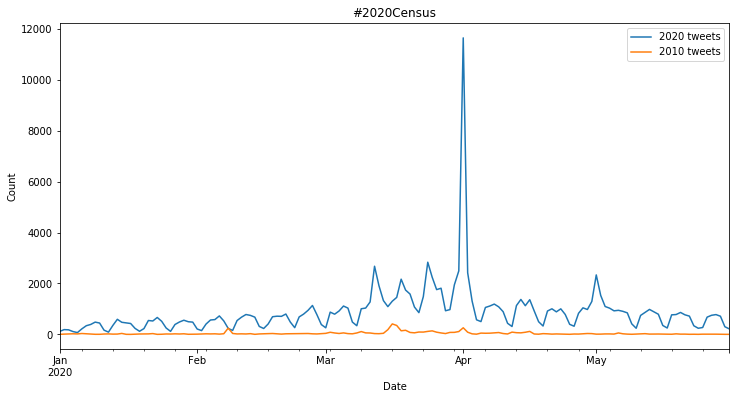

In [6]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

grouped_2020.tweets.plot(style='-', label="2020 tweets",ax=ax)
grouped_2010.tweets.plot(style='-', label="2010 tweets",ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Count")

ax.set_title("#2020Census")
plt.legend();

Days with more tweets:

In [7]:
print("2020:")
print(grouped_2020.sort_values(["tweets"], ascending=False)["tweets"].iloc[:5])

print("\n2010:")
print(grouped_2010.sort_values(["tweets"], ascending=False)["tweets"].iloc[:5])

2020:
date
2020-04-01    11647
2020-03-24     2835
2020-03-12     2677
2020-03-31     2495
2020-04-02     2422
Name: tweets, dtype: int64

2010:
date
2020-03-16    412
2020-03-17    351
2020-04-01    260
2020-02-08    246
2020-03-15    185
Name: tweets, dtype: int64


## Tweets per month

In [8]:
grouped_m_2020 = df_2020.groupby(df_2020['date'].dt.strftime('%m'))
grouped_m_2020 =pd.DataFrame({"tweets": grouped_m_2020["id"].count(),"unique_users": grouped_m_2020["username"].nunique()})

grouped_m_2010 = df_2010.groupby(df_2010['date'].dt.strftime('%m'))
grouped_m_2010 =pd.DataFrame({"tweets": grouped_m_2010["id"].count(),"unique_users": grouped_m_2010["username"].nunique()})

grouped_m_2020

,tweets,unique_users
date,,
01,10730,5016
02,16334,7403
03,42805,22632
04,38742,18209
05,23332,9113


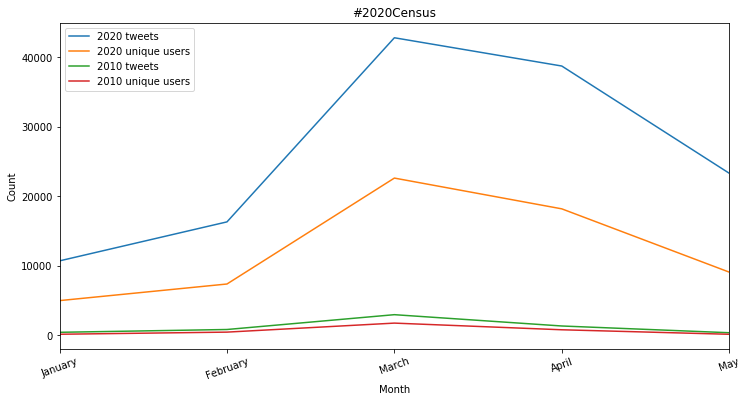

In [9]:
import calendar
fig, ax = plt.subplots(1,1,figsize=(12,6))

grouped_m_2020.tweets.plot(style='-', label="2020 tweets",ax=ax)
grouped_m_2020.unique_users.plot(style="-",label="2020 unique users",ax=ax)

grouped_m_2010.tweets.plot(style='-', label="2010 tweets",ax=ax)
grouped_m_2010.unique_users.plot(style="-",label="2010 unique users",ax=ax)

ax.set_xlabel("Month")
ax.set_ylabel("Count")

ax.set_title("#2020Census")
plt.xticks(np.arange(5), calendar.month_name[1:6], rotation=20)
plt.legend();

## Most active users

### In 2020:

In [10]:
grouped_u_2020 = df_2020.groupby(df_2020['username'])
grouped_u_2020 =pd.DataFrame({"tweets": grouped_u_2020["id"].count(),"days": grouped_u_2020["date"].nunique()})
grouped_u_2020 = grouped_u_2020.sort_values(by=["tweets"],ascending=False)
grouped_u_2020["position"] = np.arange(len(grouped_u_2020))+1
grouped_u_2020 = grouped_u_2020[["position","tweets","days"]]
grouped_u_2020[:20]

,position,tweets,days
username,,,
hansilowang,1,838,117
uscensusbureau,2,287,124
KansasCounts,3,277,92
LawyersComm,4,275,82
CM20207,5,260,42
CTCounts2020,6,234,106
SDIDEC,7,227,104
TrueNorth_CS,8,226,125
ABNYCensus2020,9,219,82


### @hansilowang tweets

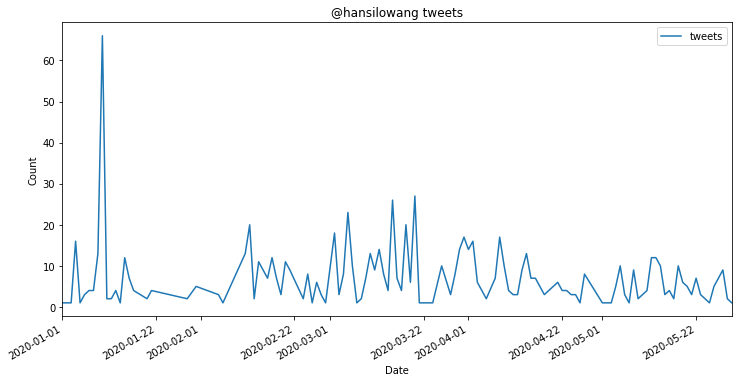

In [11]:
hw_grouped = df_2020[df_2020.username=="hansilowang"].groupby("date")
hw_grouped =pd.DataFrame({"tweets": hw_grouped["id"].count()})

fig, ax = plt.subplots(1,1,figsize=(12,6))

hw_grouped.tweets.plot(style='-', label="tweets",ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("Count")

ax.set_title("@hansilowang tweets")
plt.legend();

### In 2010:

In [12]:
grouped_u_2010 = df_2010.groupby(df_2010['username'])
grouped_u_2010 =pd.DataFrame({"tweets": grouped_u_2010["id"].count(),"days": grouped_u_2010["date"].nunique()})
grouped_u_2010 = grouped_u_2010.sort_values(by=["tweets"],ascending=False)
grouped_u_2010["position"] = np.arange(len(grouped_u_2010))+1
grouped_u_2010 = grouped_u_2010[["position","tweets","days"]]
grouped_u_2010[:20]

,position,tweets,days
username,,,
CACensus2010,1,573,103
uscensusbureau,2,74,38
yaeshora2014,3,68,17
CLSJ_MEC,4,50,9
BarrHills_IL,5,49,25
marajade13,6,47,21
TwiterHero,7,45,4
TBTOE,8,39,27
sacampbell0181,9,39,1


### Coincidences in 2010 and 2020 top 100 users:

In [13]:
list_2020 = list(grouped_u_2020.sort_values(by=["tweets"],ascending=False)[:100].index)
list_2010 = list(grouped_u_2010.sort_values(by=["tweets"],ascending=False)[:100].index)
coincidences = [x for x in list_2010 if x in list_2020]

c_2020 = grouped_u_2020.loc[coincidences,["position"]]
c_2020.columns = ["2020 position"]
c_2010 = grouped_u_2010.loc[coincidences,["position"]]
c_2010.columns = ["2010 position"]

df_coincidences = pd.concat([c_2010, c_2020], axis=1)
df_coincidences

,2010 position,2020 position
username,,
uscensusbureau,2,2
SR_spatial,45,82


## Shared urls

In [14]:
df_2010["date"] = df_2010.real_date
df_2010.drop(columns=["real_date"],inplace=True)

In [15]:
df_urls_2020 = df_2020[df_2020.text.str.contains("http")][["date","text"]]
df_urls_2020.reset_index(inplace=True)

df_urls_2010 = df_2010[df_2010.text.str.contains("http")][["date","text"]]
df_urls_2010.reset_index(inplace=True)

In [16]:
from pyspark.sql import SparkSession
import re

spark= SparkSession.builder.getOrCreate()

rdd_2020 = spark.createDataFrame(df_urls_2020).rdd
rdd_2010 = spark.createDataFrame(df_urls_2010).rdd


In [17]:
regex_val = 'http[^ ]+'

data_2020 = rdd_2020.map(lambda x: (x.date, re.findall(regex_val, x.text.lower() ) )).flatMapValues(lambda x: x)\
.map(lambda x: (x[0], x[1].rstrip("/").rstrip(".").rstrip(",").rstrip(";").rstrip("/")     ) )\
.map(lambda x: ( x[1], [x[0].date()] )).reduceByKey(lambda x,y: x+y ).map(lambda x: (x[0],len(x[1]),x[1]  ))


In [18]:
data_2010 = rdd_2010.map(lambda x: (x.date, re.findall(regex_val, x.text.lower() ) )).flatMapValues(lambda x: x)\
.map(lambda x: (x[0], x[1].rstrip("/").rstrip(".").rstrip(",").rstrip(";").rstrip("/")     ) )\
.map(lambda x: ( x[1], [x[0].date()] )).reduceByKey(lambda x,y: x+y )\
.map(lambda x: ( x[0],len(x[1]),x[1]  ))



### 2020 urls

In [19]:
df_urls_2020 = data_2020.toDF().toPandas()
df_urls_2020.columns = ["url","count","dates"]
df_urls_2020.sort_values(by="count",ascending=False,inplace=True)
df_urls_2020.reset_index(inplace=True)
df_urls_2020=df_urls_2020[["url","count","dates"]]
df_urls_2020.loc[:50]

,url,count,dates
0,http://2020census.gov,10329,"[2020-01-01, 2020-01-02, 2020-01-02, 2020-01-0..."
1,http://my2020census.gov,7472,"[2020-02-11, 2020-02-14, 2020-02-14, 2020-02-1..."
2,https://my2020census.gov,3327,"[2020-03-03, 2020-03-06, 2020-03-06, 2020-03-1..."
3,https://2020census.gov,1968,"[2020-01-03, 2020-01-08, 2020-01-14, 2020-01-1..."
4,http://www.2020census.gov,1308,"[2020-01-02, 2020-01-03, 2020-01-06, 2020-01-0..."
5,http://www.my2020census.gov,1095,"[2020-03-02, 2020-03-05, 2020-03-06, 2020-03-0..."
6,http://2020census.gov/jobs,492,"[2020-01-02, 2020-01-02, 2020-01-02, 2020-01-0..."
7,http://californiacensus.org,485,"[2020-01-03, 2020-01-12, 2020-01-13, 2020-01-1..."
8,https://2020census.gov/en.html,391,"[2020-01-15, 2020-01-22, 2020-01-23, 2020-01-2..."
9,http://2020census.gov!,316,"[2020-01-08, 2020-01-29, 2020-01-30, 2020-02-1..."


### 2010 urls

In [20]:
df_urls_2010 = data_2010.toDF().toPandas()
df_urls_2010.columns = ["url","count","dates"]
df_urls_2010.sort_values(by="count",ascending=False,inplace=True)
df_urls_2010.reset_index(inplace=True)
df_urls_2010=df_urls_2010[["url","count","dates"]]
df_urls_2010[:20]

,url,count,dates
0,http://tinyurl.com/23q4qul,40,"[2010-05-05, 2010-05-06, 2010-05-06, 2010-05-0..."
1,http://www.taiwaneseamerican.org/census2010,39,"[2010-03-02, 2010-03-02, 2010-03-02, 2010-03-0..."
2,http://bit.ly/mhzf,28,"[2010-03-02, 2010-03-02, 2010-03-02, 2010-03-0..."
3,http://becountedrepresent.com/californiacomple...,20,"[2010-02-13, 2010-02-18, 2010-02-19, 2010-02-2..."
4,http://bit.ly/7j83mp,19,"[2010-02-08, 2010-02-08, 2010-02-08, 2010-02-0..."
5,http://bit.ly/9im7tm,19,"[2010-03-15, 2010-03-15, 2010-03-15, 2010-03-1..."
6,http://tiny.cc/census32,17,"[2010-01-02, 2010-01-02, 2010-01-03, 2010-01-1..."
7,http://tiny.cc/censusfaqs,17,"[2010-01-28, 2010-01-30, 2010-02-07, 2010-02-1..."
8,http://bit.ly/cqbwa2,15,"[2010-02-24, 2010-02-24, 2010-02-24, 2010-02-2..."
9,http://bit.ly/bg1ifn,14,"[2010-03-19, 2010-03-23, 2010-03-24, 2010-03-2..."


## Mentions network

### 2020 network

In [21]:
mentions_2020 = df_2020[df_2020.mentions.notnull()][["username","mentions","date"]]
mentions_2020.head()

,username,mentions,date
0,CountTheNation,@ColorOfChange @NALEO @uscensusbureau,2020-01-01
4,JeffWice,@mandy_fries @timesunion @NYLawSchool @NYElect...,2020-01-01
5,JulieMenin,@1kathleendaniel,2020-01-01
8,BridgetDowdKJZZ,@kjzzphoenix,2020-01-01
15,TrueNorth_CS,@uscensusbureau,2020-01-01


In [22]:
rdd = spark.createDataFrame(mentions_2020).rdd

In [23]:
data = rdd.map(lambda x: ( ("@"+x.username, x.date.date()) ,x.mentions.split(" ")) ).flatMapValues(lambda x: x)\
.map(lambda x: (x[0][0],x[1],x[0][1]))

In [24]:
import networkx as nx

G = nx.Graph()
D = nx.DiGraph()
for i in data.collect():
    G.add_edge(i[0], i[1])
    D.add_edge(i[0], i[1])

In [25]:
print("Number of nodes:", len(G.nodes()))
print("Number of edges:", len(G.edges()))

Number of nodes: 28705
Number of edges: 42004


In [26]:
components_2020 = list(nx.connected_components(G))

In [27]:
print("Number of connected components:",len(components_2020))
print("Largest components:")
sorted([len(x) for x in components_2020],reverse=True)[:10]

Number of connected components: 1758
Largest components:


[24091, 24, 23, 20, 17, 16, 13, 11, 11, 11]

In [28]:
out_degree = {k: v for k, v in sorted(dict(D.out_degree()).items(), reverse=True , key=lambda item: item[1])}
in_degree = {k: v for k, v in sorted(dict(D.in_degree()).items(), reverse=True , key=lambda item: item[1])}

In [29]:
print("Nodes with more edges going out:\n",{x: out_degree[x] for x  in  list(out_degree)[:10] } )
print("\nNodes with more edges going in:\n",{x: in_degree[x] for x  in  list(in_degree)[:10] } )

Nodes with more edges going out:
 {'@hansilowang': 153, '@LawyersComm': 134, '@JeffWice': 122, '@JuanRosa_NYC': 119, '@ABNYCensus2020': 116, '@CommBovo': 99, '@Census2020Map': 96, '@JulieMenin': 93, '@WeCountWeRise': 83, '@MontseTXAFLCIO': 77}

Nodes with more edges going in:
 {'@uscensusbureau': 4690, '@NALEO': 283, '@CACensus': 265, '@YouTube': 265, '@realDonaldTrump': 211, '@sesamestreet': 197, '@CACompleteCount': 194, '@staceyabrams': 186, '@hansilowang': 135, '@CensusCounts': 121}


### 2010 network

In [30]:
mentions_2010 = df_2010[df_2010.mentions.notnull()][["username","mentions","date"]]
mentions_2010.head()

,username,mentions,date
21,CACensus2010,@NAAPOC @gruvworld @giorodriguez @shaziakamal ...,2010-01-03
29,TheFireTracker2,@CACensus2010,2010-01-03
37,ThisIsFeliciaH,@fharvey1913 @uscensusbureau,2010-01-04
39,ArzuBusiness,@TODAYshow,2010-01-04
40,AKauwela,@TODAYshow,2010-01-04


In [31]:
rdd = spark.createDataFrame(mentions_2010).rdd

data = rdd.map(lambda x: ( ("@"+x.username, x.date.date()) ,x.mentions.split(" ")) ).flatMapValues(lambda x: x)\
.map(lambda x: (x[0][0],x[1],x[0][1]))

In [32]:
G_2010 = nx.Graph()
D_2010 = nx.DiGraph()
for i in data.collect():
    G_2010.add_edge(i[0], i[1])
    D_2010.add_edge(i[0], i[1])

In [33]:
print("Number of nodes:", len(G_2010.nodes()))
print("Number of edges:", len(G_2010.edges()))

Number of nodes: 2172
Number of edges: 1985


In [34]:
components_2010 = list(nx.connected_components(G_2010))

print("Number of connected components:",len(components_2010))
print("Largest components:")
sorted([len(x) for x in components_2010],reverse=True)[:10]

Number of connected components: 463
Largest components:


[996, 20, 11, 9, 9, 9, 9, 7, 7, 7]

In [35]:
out_degree_2010 = {k: v for k, v in sorted(dict(D_2010.out_degree()).items(), reverse=True , key=lambda item: item[1])}
in_degree_2010 = {k: v for k, v in sorted(dict(D_2010.in_degree()).items(), reverse=True , key=lambda item: item[1])}

In [36]:
print("Nodes with more edges going out:\n",{x: out_degree_2010[x] for x  in  list(out_degree_2010)[:10] } )
print("\nNodes with more edges going in:\n",{x: in_degree_2010[x] for x  in  list(in_degree_2010)[:10] } )

Nodes with more edges going out:
 {'@sacampbell0181': 35, '@CACensus2010': 23, '@phatjo21': 22, '@PowhatanTribe': 13, '@urbandata': 12, '@uscensusbureau': 10, '@DJKCity': 10, '@uscb_boston': 10, '@SR_spatial': 8, '@byJody': 8}

Nodes with more edges going in:
 {'@uscensusbureau': 424, '@CACensus2010': 31, '@washingtonpost': 24, '@CoryBooker': 21, '@glennbeck': 16, '@ludajuice': 16, '@KarlFrisch': 14, '@edatpost': 12, '@GovGranholm': 12, '@urbandata': 9}


### Coincidences in largest the component of 2010 and 2020

In [37]:
largest_2020 = components_2020
largest_2020.sort(key=len,reverse=True)
largest_2020 = largest_2020[0]

largest_2010 = components_2010
largest_2010.sort(key=len,reverse=True)
largest_2010 = largest_2010[0]

network_coincidences = [x for x in largest_2020 if x in largest_2010]
network_coincidences.sort()

while len(network_coincidences)%4!=0:
    network_coincidences.append("")
rows=int(len(network_coincidences)/4)


df_net_c = pd.DataFrame({"A":network_coincidences[:rows],
                        "B":network_coincidences[rows:2*rows],
                        "C":network_coincidences[2*rows:3*rows],
                        "D":network_coincidences[3*rows:]})

df_net_c

,A,B,C,D
0,@AAPOR,@MNAonline,@UMassAmherst,@kewingct
1,@AARP,@MassCouncil,@USATODAY,@latimes
2,@AARPMA,@MassGov,@UnitedWayMABay,@leagueofcities
3,@APIAVote,@MetroGram,@UnitedWayPDX,@leecruz
4,@AllianceNews,@Metroplanners,@Univision,@lynnsweet
5,@BarackObama,@MiFamiliaVota,@UtahGov,@mrgeog
6,@BrianLehrer,@MsPeoples,@WeAreOneOC,@multco
7,@CalVolunteers,@NAACP,@WhiteHouse,@mydorchester
8,@CarrollCoMD,@NCoC,@aaaricuny,@naacpimageaward
9,@Chicago_Police,@NPR,@aecfkidscount,@nakasec


## Other hashtags

In [38]:
hasthags_2020 = df_2020[df_2020.hashtags.notnull()][["hashtags","date"]]
hasthags_2010 = df_2010[df_2010.hashtags.notnull()][["hashtags","date"]]
hasthags_2020.head()

,hashtags,date
0,#ThisisUS #StandUpBeCounted #2020Census #Every...,2020-01-01
1,#HappyNewYear #2020Census #Census101 #WakeCounts,2020-01-01
2,#CENSO2020 #CENSO2020 #OCCuenta2020 #NewYear #...,2020-01-01
3,#2020Census,2020-01-01
4,#2020Census,2020-01-01


In [39]:
rdd_2020 = spark.createDataFrame(hasthags_2020).rdd
rdd_2010 = spark.createDataFrame(hasthags_2010).rdd

In [40]:
data_2020 = rdd_2020.map(lambda x: ( x.date.date() ,x.hashtags.lower().split(" ")) ).flatMapValues(lambda x: x)\
.map(lambda x: (x[1],[x[0]]))\
.reduceByKey(lambda x,y: x+y ).map(lambda x: (x[0],len(x[1]),x[1]  ))

data_2010 = rdd_2010.map(lambda x: ( x.date.date() ,x.hashtags.lower().split(" ")) ).flatMapValues(lambda x: x)\
.map(lambda x: (x[1],[x[0]]))\
.reduceByKey(lambda x,y: x+y ).map(lambda x: (x[0],len(x[1]),x[1]  ))

### 2020

In [41]:
hashtags_2020 = data_2020.toDF().toPandas()
hashtags_2020.columns = ["hashtag","count","dates"]
hashtags_2020 = hashtags_2020[~hashtags_2020.hashtag.isin(["#2020census","#census2020"])]
hashtags_2020.set_index("hashtag",inplace=True)
hashtags_2020.sort_values(by="count",ascending=False,inplace=True)
hashtags_2020["position"] = np.arange(len(hashtags_2020))+1
hashtags_2020 = hashtags_2020[["position","count","dates"]]
hashtags_2020[:20]

,position,count,dates
hashtag,,,
#census,1,6432,"[2020-01-01, 2020-01-01, 2020-01-01, 2020-01-0..."
#becounted,2,5531,"[2020-01-01, 2020-01-01, 2020-01-02, 2020-01-0..."
#everyonecounts,3,3762,"[2020-01-01, 2020-01-01, 2020-01-02, 2020-01-0..."
#censusday,4,3578,"[2020-01-02, 2020-01-06, 2020-01-08, 2020-01-0..."
#covid19,5,3220,"[2020-02-13, 2020-02-25, 2020-02-27, 2020-02-2..."
#getcountednyc,6,3019,"[2020-01-01, 2020-01-02, 2020-01-02, 2020-01-0..."
#countallkids,7,2813,"[2020-01-01, 2020-01-01, 2020-01-02, 2020-01-0..."
#shapeyourfuture,8,2786,"[2020-01-02, 2020-01-06, 2020-01-06, 2020-01-0..."
#getcounted,9,2385,"[2020-01-01, 2020-01-01, 2020-01-02, 2020-01-0..."


### 2010

In [42]:
hashtags_2010 = data_2010.toDF().toPandas()
hashtags_2010.columns = ["hashtag","count","dates"]
hashtags_2010 = hashtags_2010[~hashtags_2010.hashtag.isin(["#2010census","#census2010"])]
hashtags_2010.set_index("hashtag",inplace=True)
hashtags_2010.sort_values(by="count",ascending=False,inplace=True)
hashtags_2010["position"] = np.arange(len(hashtags_2010))+1
hashtags_2010 = hashtags_2010[["position","count","dates"]]
hashtags_2010[:20]

,position,count,dates
hashtag,,,
#census,1,251,"[2010-01-04, 2010-01-05, 2010-01-06, 2010-01-0..."
#sb44,2,185,"[2010-02-07, 2010-02-07, 2010-02-07, 2010-02-0..."
#fb,3,54,"[2010-01-05, 2010-01-15, 2010-01-22, 2010-02-0..."
#tcot,4,52,"[2010-01-07, 2010-01-28, 2010-02-05, 2010-02-0..."
#becounted,5,49,"[2010-01-18, 2010-01-18, 2010-01-20, 2010-01-2..."
#taiwanese,6,47,"[2010-03-02, 2010-03-02, 2010-03-02, 2010-03-0..."
#lastdaycensus,7,41,"[2010-04-15, 2010-04-15, 2010-04-15, 2010-04-1..."
#censo,8,30,"[2010-01-28, 2010-01-28, 2010-03-05, 2010-03-0..."
#fail,9,27,"[2010-01-06, 2010-02-08, 2010-02-08, 2010-02-0..."


### Coincidences in 2010 and 2020 top 100 hashtags

In [43]:
list_2020 = list(hashtags_2020[:100].index)
list_2010 = list(hashtags_2010[:100].index)
coincidences = [x for x in list_2010 if x in list_2020]

c_2020 = hashtags_2020.loc[coincidences,["position"]]
c_2020.columns = ["2020 position"]
c_2010 = hashtags_2010.loc[coincidences,["position"]]
c_2010.columns = ["2010 position"]

df_coincidences = pd.concat([c_2010, c_2020], axis=1)
df_coincidences

,2010 position,2020 position
hashtag,,
#census,1,1
#becounted,5,2
#censo,8,53
#uscensus,25,49
#queerthecensus,40,51
#nyc,46,92
#censusday,80,4
#jobs,88,79
